In [10]:
# Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.index import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  

In [11]:
# Load the continuous and discrete variables into continuous_df and discrete_df variables.
url = "./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
df = pd.read_csv(url)

In [12]:
df.columns = standardize_columns_names(df.columns)
df.effective_to_date = pd.to_datetime(df.effective_to_date)
df['effective_to_date_day'] = df.effective_to_date.dt.day
df['effective_to_date_month'] = df.effective_to_date.dt.month
df['effective_to_date_year'] = df.effective_to_date.dt.year
df = df.drop('effective_to_date', axis=1)
df.set_index("customer", inplace=True)

In [13]:
df_disc, df_cont, df_cat = categorize_dataframe(df)
df = pd.concat([df_disc, df_cont, df_cat], axis=1)
# df.response = df.response.map({'Yes': 1, 'No': 0})
display(df.head(5))
display(df.shape)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,qty_open_complaints,qty_policies,effective_to_date_day,effective_to_date_month,effective_to_date_year,customer_lifetime_value,income,...,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,69,32,5,0,1,24,2,2011,2763.519279,56274,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,94,13,42,0,8,31,1,2011,6979.535903,0,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,108,18,38,0,2,19,2,2011,12887.431650,48767,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,106,18,65,0,7,20,1,2011,7645.861827,0,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,73,12,44,0,1,3,2,2011,2813.692575,43836,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(9134, 25)

## Plots

### Discrete

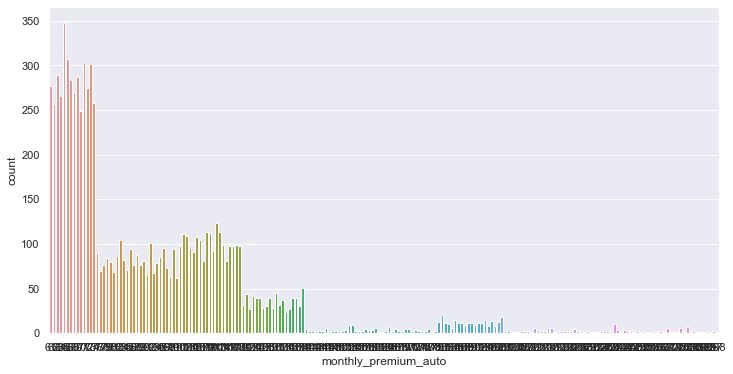

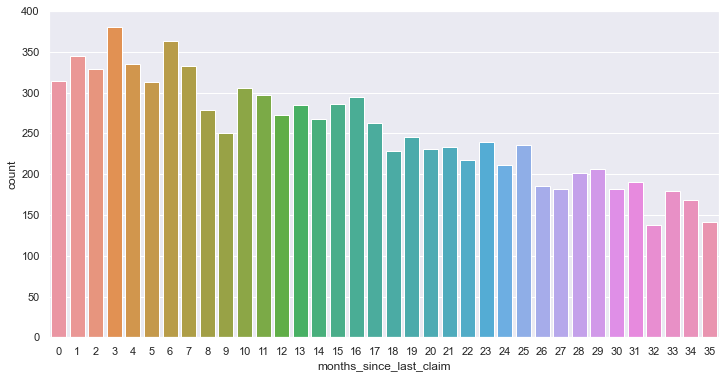

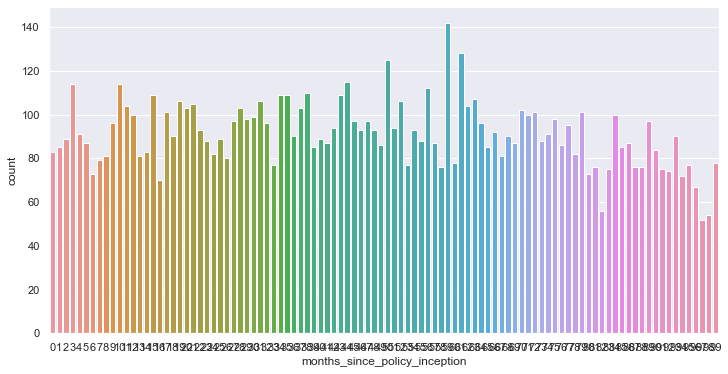

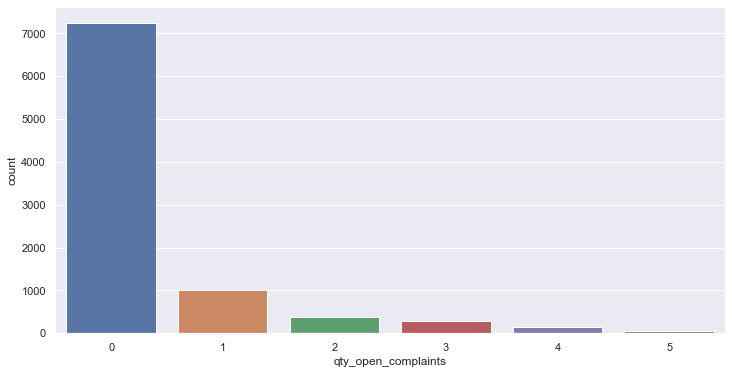

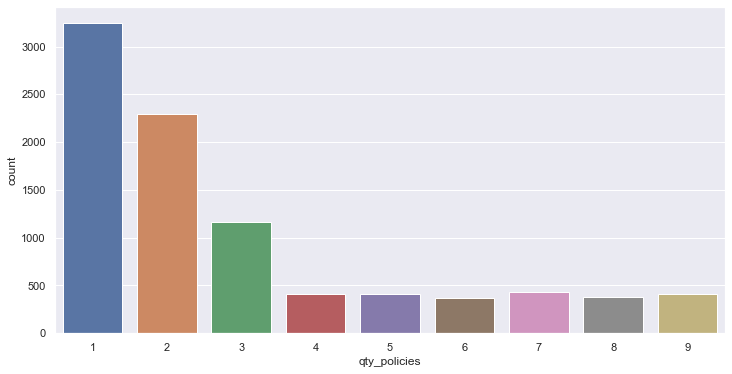

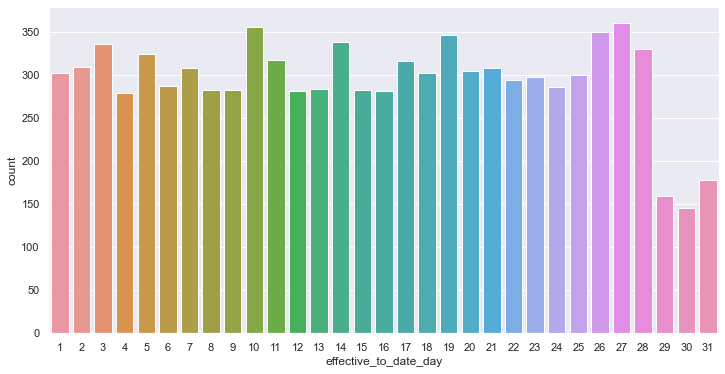

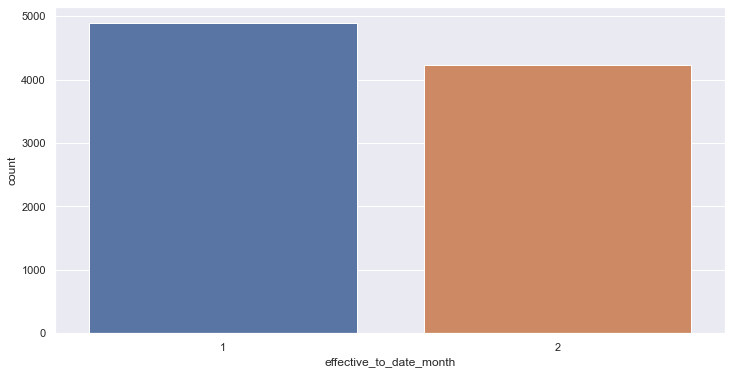

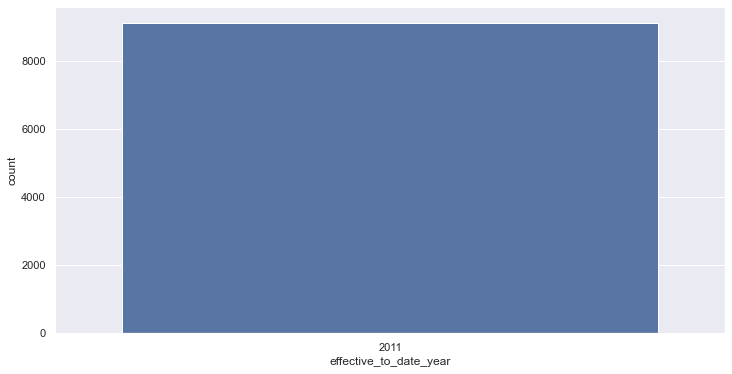

In [14]:
for col in df_disc:
    sns.set(rc={'figure.figsize':(12, 6)})
    plt.figure()
    sns.countplot(x=df_disc[col])
    plt.show()

### Continuous 

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

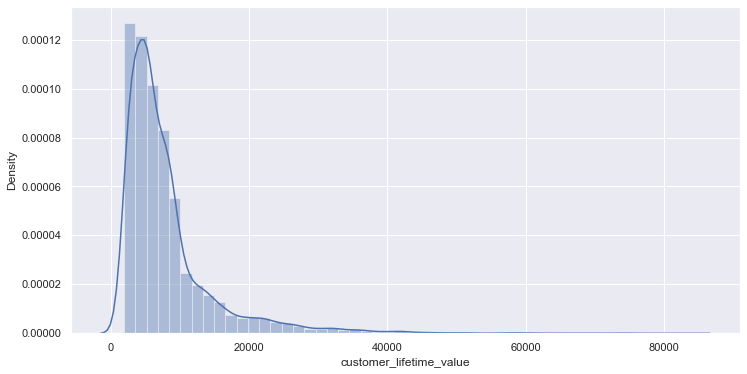

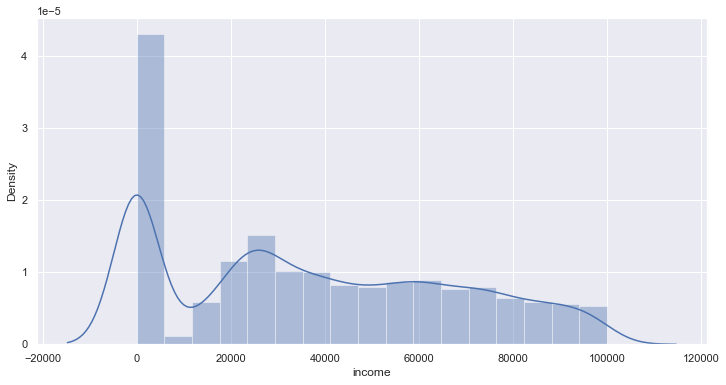

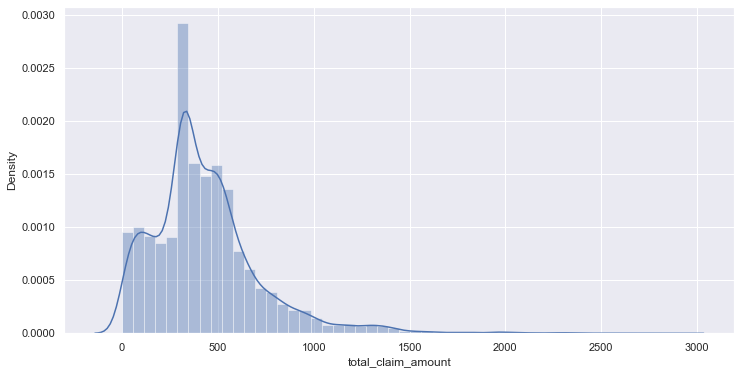

In [15]:
for col in df_cont:
    sns.set(rc={'figure.figsize':(12, 6)})
    plt.figure()
    sns.distplot(df_cont[col])

### Categorical

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

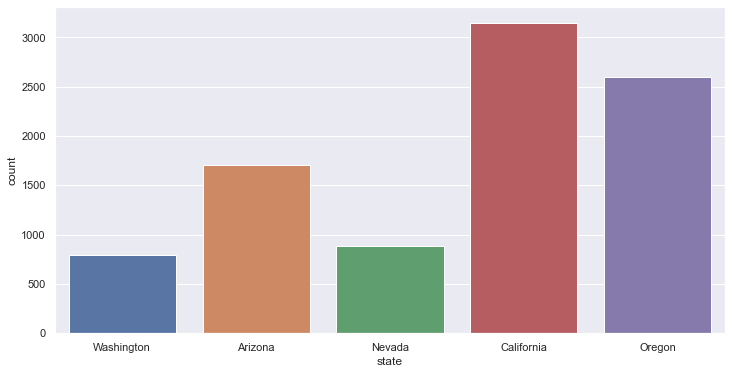

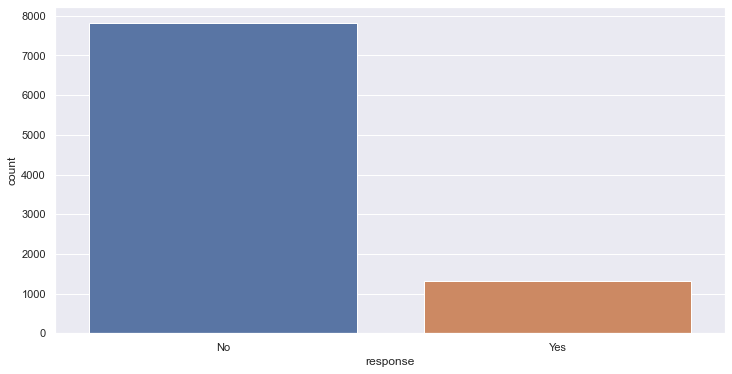

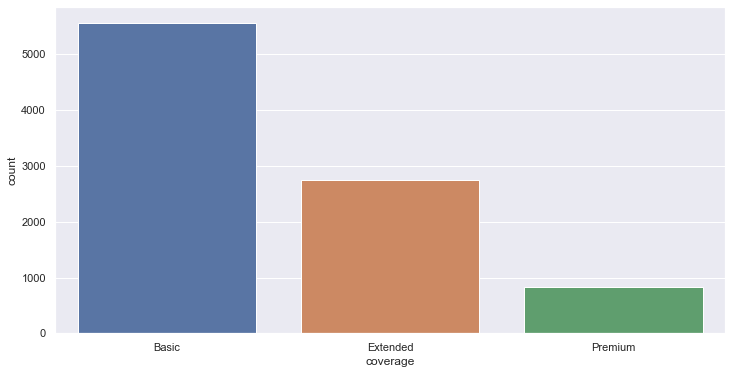

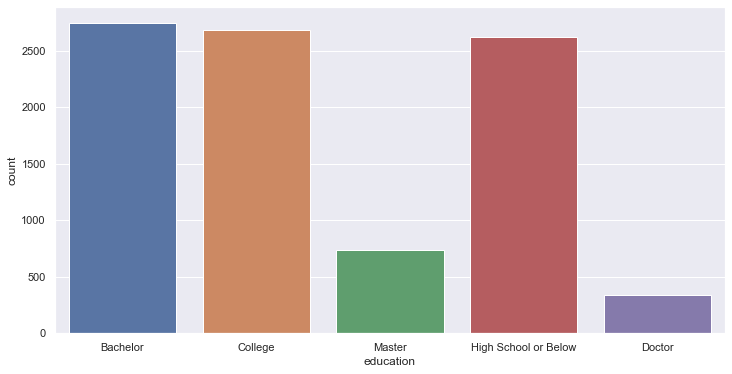

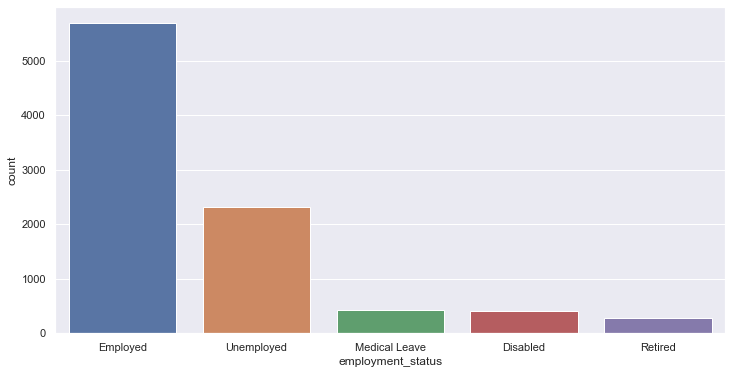

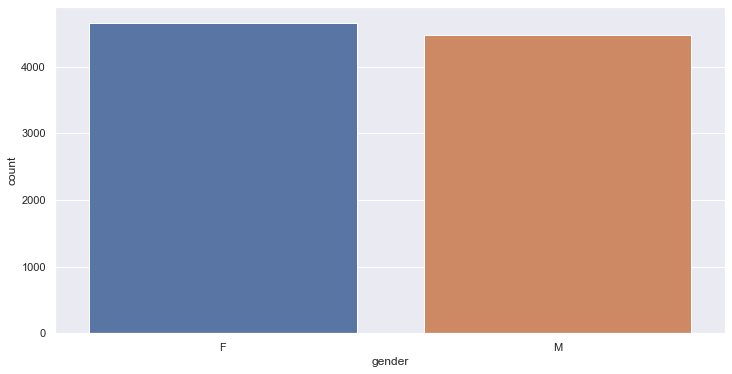

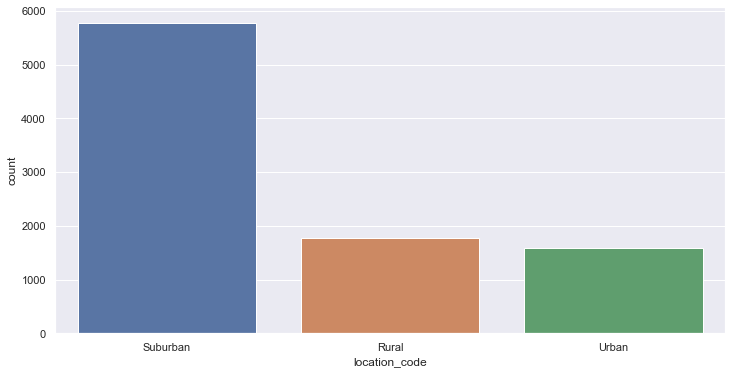

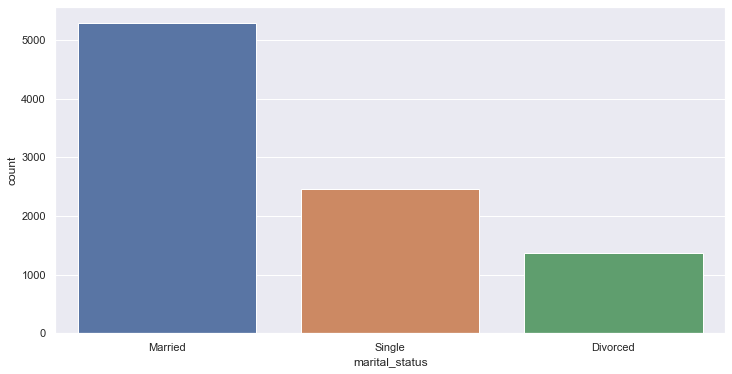

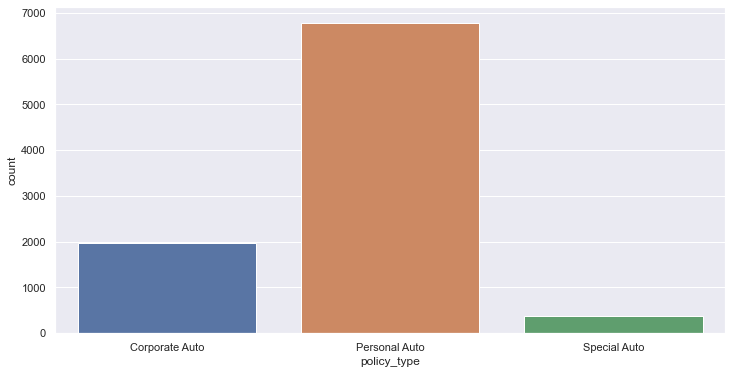

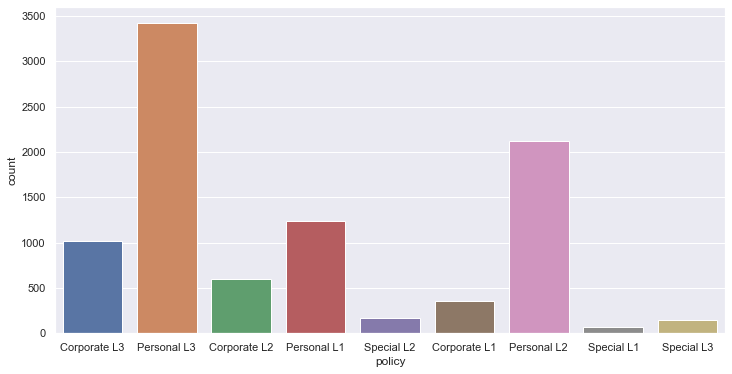

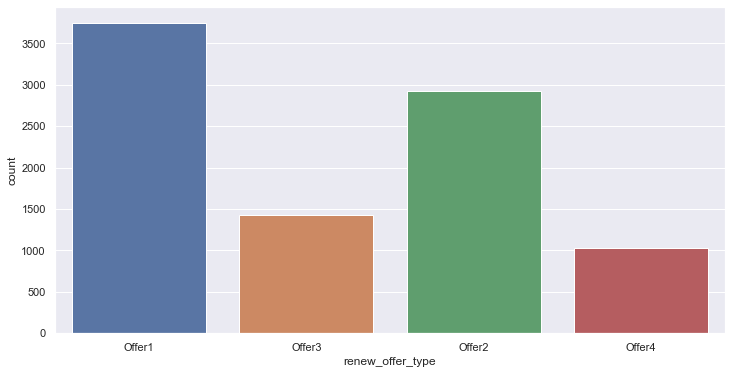

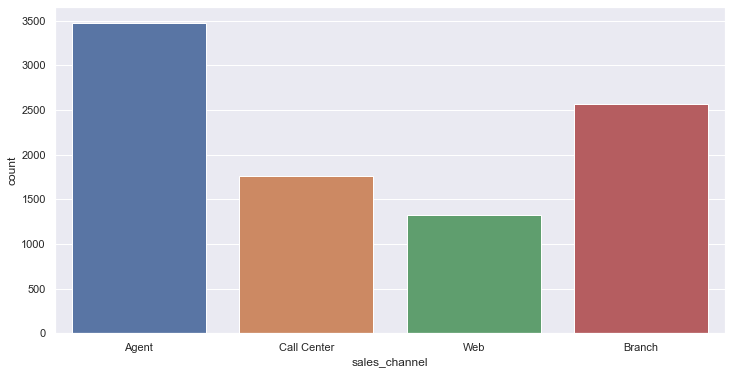

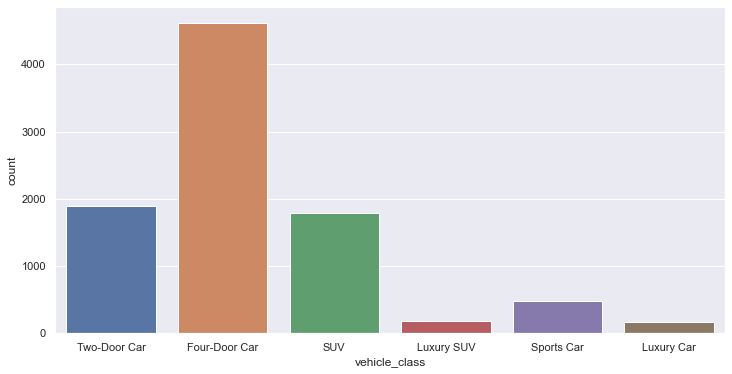

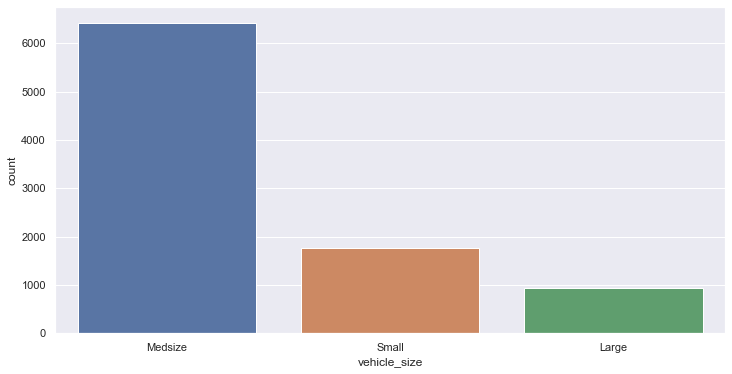

In [16]:
for col in df_cat:
    sns.set(rc={'figure.figsize': (12, 6)})
    plt.figure()
    sns.countplot(df_cat[col])



## Standarization

In [17]:

X_train, X_test, y_train, y_test = split_data(df=df, target="total_claim_amount")
display(X_train.shape)
X_train_scaled, X_test_scaled = scale_data(sets=[X_train, X_test], scaler=MinMaxScaler)
display(X_train_scaled.shape)
X_train_scaled_logTrans, X_test_scaled_logTrans = apply_log_transform(sets=[X_train_scaled, X_test_scaled])
display(X_train_scaled_logTrans.shape)
X_train_scaled_logTrans_encoded, X_test_scaled_logTrans_encoded = encode_data(
    scaled_sets=[X_test_scaled_logTrans, X_test_scaled_logTrans], encoder=OneHotEncoder
)
y_train.shape


(6850, 24)

(6850, 24)

(6850, 24)

(6850,)

In [1]:
### next step train the model